# Classification Results

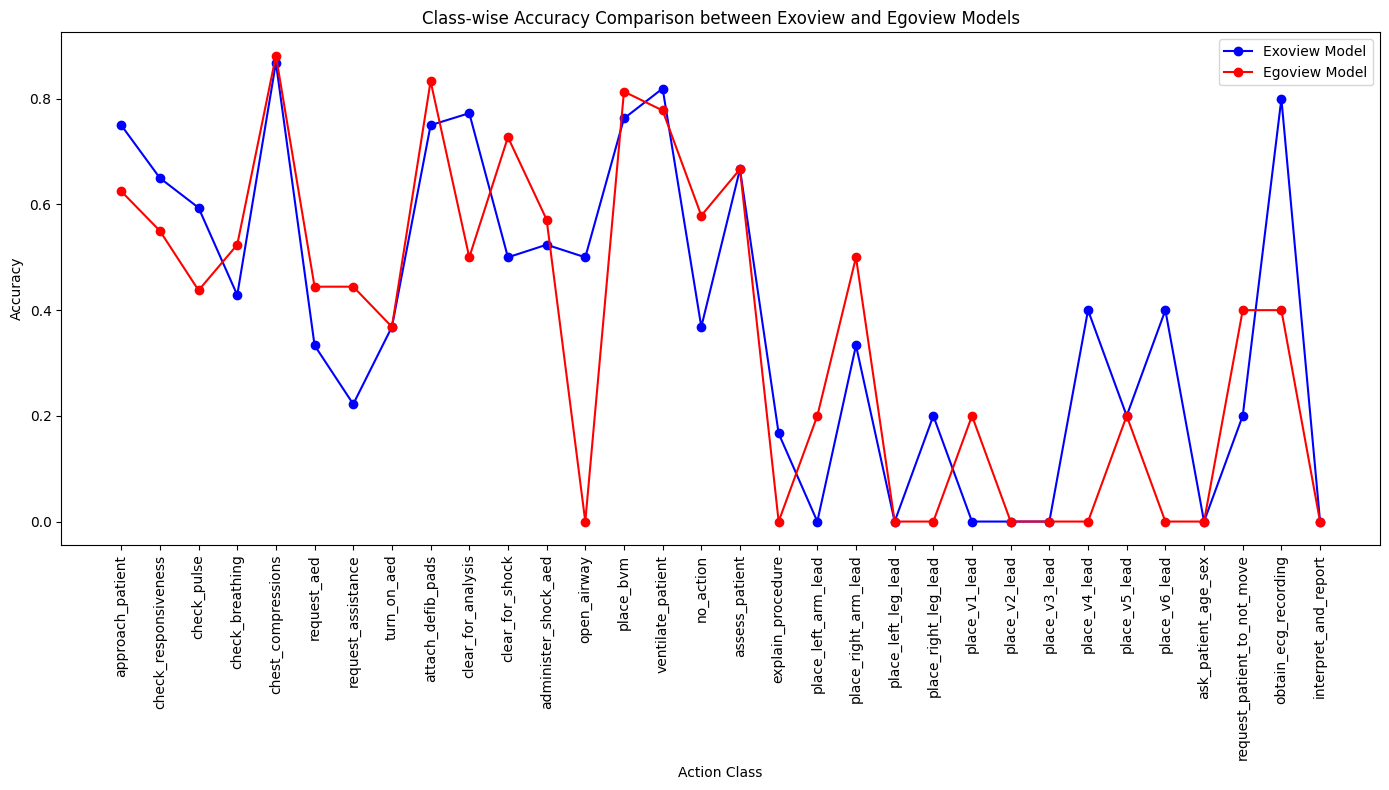

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the class-wise accuracy CSV files
egoview_df = pd.read_csv('./results/model_id_65531096_on_20241031-124500/final_classwise_accuracy.csv')
exoview_df = pd.read_csv('./results/model_id_65620060_on_20241101-203821/final_classwise_accuracy.csv') 
ego_exoview_df = pd.read_csv('./results/model_id_65531757_on_20241031-124713/final_classwise_accuracy.csv') 

# Mapping the action IDs to their corresponding natural language classes
class_mapping_json = '../../../Tools/annotation_generation/class_id_mappings.json' 

class_mapping = None
# Load the JSON file containing the class ID mappings
with open(class_mapping_json, 'r') as f:
    mapping = json.load(f)
    class_mapping = mapping['keysteps']

# invert the mapping
class_mapping = {v: k for k, v in class_mapping.items()}

# Apply the mapping to the action columns in both DataFrames
exoview_df['action'] = exoview_df['action'].map(class_mapping)
egoview_df['action'] = egoview_df['action'].map(class_mapping)
ego_exoview_df['action'] = ego_exoview_df['action'].map(class_mapping)

# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(exoview_df['action'], exoview_df['accuracy'], marker='o', color='blue', label='Exoview Model')
plt.plot(egoview_df['action'], egoview_df['accuracy'], marker='o', color='red', label='Egoview Model')
# plt.plot(ego_exoview_df['action'], ego_exoview_df['accuracy'], marker='x', color='green', label='Ego-Exoview Model', linestyle='--')

# Adding labels, title, and enhancing x-axis readability
plt.xlabel('Action Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy Comparison between Exoview and Egoview Models')
plt.xticks(rotation=90)
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


# Segmentation Results

/tmp/ipykernel_173182/2290409613.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoview_filtered['model'] = 'Exoview Model'
/tmp/ipykernel_173182/2290409613.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egoview_filtered['model'] = 'Egoview Model'


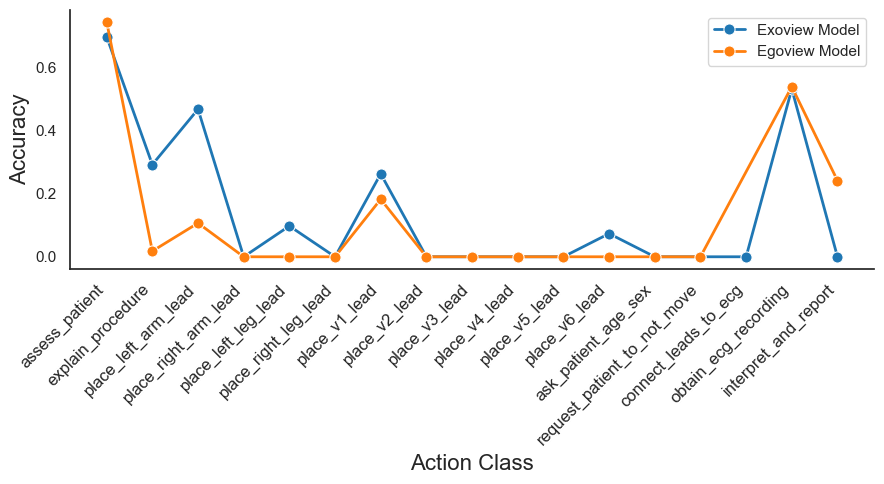

Classes where Egoview model has higher accuracy:
                  action  accuracy_egoview
1   check_responsiveness            0.5919
3        check_breathing            0.6986
4     chest_compressions            0.7886
9     clear_for_analysis            0.8269
11  administer_shock_aed            0.3922
16        assess_patient            0.7444
30  obtain_ecg_recording            0.5387
31  interpret_and_report            0.2413

Classes where Exoview model has higher accuracy:
                 action  accuracy_exoview
0      approach_patient            0.6717
2           check_pulse            0.5260
7           turn_on_aed            0.1929
8     attach_defib_pads            0.5769
10      clear_for_shock            0.2281
13            place_bvm            0.3622
14    ventilate_patient            0.5899
15            no_action            0.4547
17    explain_procedure            0.2919
18  place_left_arm_lead            0.4674
20  place_left_leg_lead            0.0975
22        

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the class-wise accuracy CSV files
egoview_df = pd.read_csv('./results/model_id_65531798_on_20241031-130537/final_classwise_accuracy.csv')
exoview_df = pd.read_csv('./results/model_id_65620366_on_20241101-204042/final_classwise_accuracy.csv') 

# Mapping the action IDs to their corresponding natural language classes
class_mapping_json = '../../../Tools/annotation_generation/class_id_mappings.json' 

# Load the JSON file containing the class ID mappings
with open(class_mapping_json, 'r') as f:
    mapping = json.load(f)
    class_mapping = mapping['keysteps']

# Invert the mapping
class_mapping = {v: k for k, v in class_mapping.items()}

# Apply the mapping to the action columns in both DataFrames
exoview_df['action'] = exoview_df['action'].map(class_mapping)
egoview_df['action'] = egoview_df['action'].map(class_mapping)

# Filter to include only keysteps from 16 onward
selected_classes = list(class_mapping.values())[16:]
exoview_filtered = exoview_df[exoview_df['action'].isin(selected_classes)]
egoview_filtered = egoview_df[egoview_df['action'].isin(selected_classes)]

# Prepare data for Seaborn by combining into a single DataFrame
exoview_filtered['model'] = 'Exoview Model'
egoview_filtered['model'] = 'Egoview Model'
combined_df = pd.concat([exoview_filtered, egoview_filtered])

# Set Seaborn style to remove the grid
sns.set_style("white")
plt.figure(figsize=(9, 5))
sns.lineplot(data=combined_df, x='action', y='accuracy', hue='model', marker='o', linewidth=2, markersize=8, palette='tab10')

# Despine and remove grid lines
sns.despine()

# Adding labels, title, and enhancing x-axis readability
plt.xlabel('Action Class', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend()

# save the plot
plt.savefig('./plots/segmentation_ecg_classwise_accuracy_comparison.png', dpi=600, bbox_inches='tight')


plt.tight_layout()
plt.show()

# Merge the DataFrames on the action class to ensure alignment
merged_df = pd.merge(exoview_df, egoview_df, on='action', suffixes=('_exoview', '_egoview'))

# Identify classes where Egoview model has higher accuracy than Exoview
higher_in_egoview = merged_df[merged_df['accuracy_egoview'] > merged_df['accuracy_exoview']]
print("Classes where Egoview model has higher accuracy:")
print(higher_in_egoview[['action', 'accuracy_egoview']])

# Identify classes where Exoview model has higher accuracy than Egoview
higher_in_exoview = merged_df[merged_df['accuracy_exoview'] > merged_df['accuracy_egoview']]
print("\nClasses where Exoview model has higher accuracy:")
print(higher_in_exoview[['action', 'accuracy_exoview']])


